<a href="https://colab.research.google.com/github/data2450/Attention_with_code/blob/main/diff_token.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is a Token Embedding in BERT?
A token embedding is a numerical representation of a word or subword from BERT's vocabulary.
This embedding is static (fixed for each token) before self-attention is applied.
Example
BERT assigns each wordpiece a unique vector.
The word "bank" always gets the same initial vector from BERT's vocabulary before attention modifies it.
2. What is BERT's Vocabulary?
Vocabulary refers to the list of all tokens BERT understands.
Each token in this vocabulary has a unique index (ID) and a fixed embedding vector.
BERT uses WordPiece Tokenization, meaning words can be split into subwords.
Example: Vocabulary in BERT (WordPiece Tokens)
BERT base (uncased) has a vocabulary size of 30,522 tokens.

Word-Level Tokenization:
Sentence: "I love playing football."
➡ BERT might tokenize this as:
["i", "love", "playing", "football", "."]

Subword-Level Tokenization:
Sentence: "I love playing volleyball."
➡ BERT might tokenize as:
["i", "love", "playing", "volley", "##ball", "."]

"volley" and "##ball" are separate tokens because "volleyball" is not in the vocabulary.
"##" means this is a continuation of a previous wordpiece.
Each token has a unique ID from BERT’s vocabulary:

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("I love playing volleyball.")
ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", ids)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokens: ['i', 'love', 'playing', 'volleyball', '.']
Token IDs: [1045, 2293, 2652, 7454, 1012]


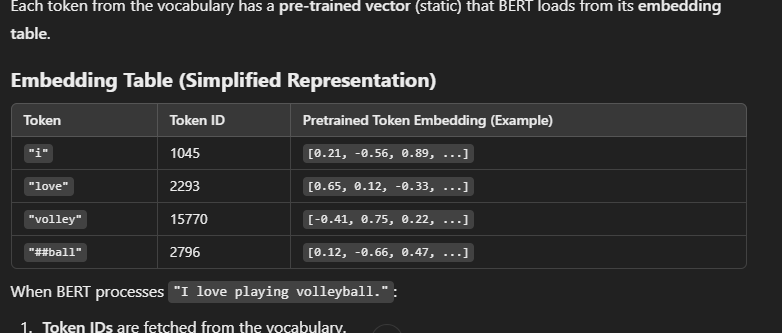

When BERT processes "I love playing volleyball.":

* Token IDs are fetched from the vocabulary.
* Token embeddings are retrieved from the embedding table.
* These embeddings are static at this stage

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Get the embedding layer (pretrained token embeddings)
embedding_layer = model.embeddings.word_embeddings  # This is the embedding lookup table

# Tokenize a sample word
word = "bank"
token_id = tokenizer.convert_tokens_to_ids(word)  # Get token ID from vocabulary

# Get the pretrained embedding for this token
pretrained_embedding = embedding_layer(torch.tensor([token_id]))  # Lookup

print(f"Token: {word}")
print(f"Token ID: {token_id}")
print(f"Pretrained Token Embedding:\n{pretrained_embedding}")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Token: bank
Token ID: 2924
Pretrained Token Embedding:
tensor([[-1.9130e-02, -6.4559e-02, -9.1287e-02, -7.7617e-02, -2.5319e-02,
          2.2042e-02,  1.8521e-02,  1.9638e-02,  1.6894e-02, -6.7071e-03,
          4.6948e-02, -2.8793e-02, -5.1419e-02, -1.9251e-02, -4.4896e-02,
          1.7663e-02, -5.0461e-02, -1.0894e-02,  4.8693e-02, -1.1041e-01,
         -5.1122e-02, -3.7074e-02,  2.8857e-02, -5.1460e-02,  1.6076e-02,
         -1.3581e-02, -5.3576e-02,  1.8215e-02,  1.7810e-02, -3.5791e-02,
          1.4486e-02,  6.1049e-02, -3.5176e-02,  1.3783e-02, -4.3533e-02,
         -3.7994e-03,  2.8376e-02, -3.9677e-03, -4.0414e-02,  8.1182e-02,
          3.3673e-02, -6.4177e-02, -3.2234e-02, -8.0122e-03, -5.0072e-02,
         -7.4676e-02,  4.7598e-02,  2.7593e-02, -7.9850e-02, -4.5297e-03,
          3.6703e-02,  4.8812e-02, -2.9139e-02, -2.9133e-03, -4.9293e-02,
         -1.9132e-02, -8.3310e-02, -8.3380e-04, -2.7214e-02, -5.3870e-02,
         -1.3290e-02, -1.7759e-03, -3.1814e-02, -5.9626e-

In [ ]:
type(pretrained_embedding)

torch.Tensor

In [ ]:
pretrained_embedding.shape

torch.Size([1, 768])

In [ ]:
tokens

['i', 'deposit', 'money', 'in', 'the', 'bank']

In [ ]:
input_ids

[1045, 12816, 2769, 1999, 1996, 2924]

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Input sentence
sentence = "I deposit money in the bank"

# Tokenize and convert to input tensors
tokens = tokenizer.tokenize(sentence)
input_ids = tokenizer.convert_tokens_to_ids(tokens)
input_tensor = torch.tensor([input_ids])  # Convert to tensor

# Get BERT outputs (last_hidden_state contains contextual embeddings)
with torch.no_grad():  # No need for gradients
    outputs = model(input_tensor)
    hidden_states = outputs.last_hidden_state  # Shape: (1, seq_len, 768)

# Find index of "bank" in tokenized sequence
word_index = tokens.index("bank")  # Get the index of "bank"

# Extract contextual embedding for "bank"
bank_embedding = hidden_states[0, word_index, :]

print(f"Tokenized Sentence: {tokens}")
print(f"Token ID Sequence: {input_ids}")
print(f"Self-Attention-Based Embedding for 'bank':\n{bank_embedding}")


Tokenized Sentence: ['i', 'deposit', 'money', 'in', 'the', 'bank']
Token ID Sequence: [1045, 12816, 2769, 1999, 1996, 2924]
Self-Attention-Based Embedding for 'bank':
tensor([-6.9105e-02,  2.2048e-01, -4.0046e-01,  1.2402e-01,  5.1972e-01,
         1.7071e-01, -4.8706e-01,  7.1349e-01, -2.5159e-01, -5.8261e-01,
        -1.6482e-01,  1.9334e-01, -1.2844e-01,  1.7302e-01, -5.9751e-01,
         3.5915e-01, -4.4069e-01, -5.8518e-02,  8.7022e-02, -1.5035e-01,
         3.6837e-01,  8.9799e-02,  1.3947e-01,  4.8704e-01, -1.2718e-01,
         2.8508e-01,  8.6338e-01, -1.3702e-01,  1.1361e-01, -1.9724e-01,
         4.2202e-01, -1.0990e-01,  1.4393e-01,  3.0418e-01, -6.7529e-02,
        -1.2597e-01, -2.0289e-01, -3.5746e-01, -6.0327e-01, -4.5082e-02,
        -2.1887e-01,  3.9528e-01, -6.4147e-01,  3.5659e-01, -3.6505e-01,
        -1.6233e-01, -8.5808e-02, -1.6761e-01,  3.5127e-01, -2.2077e-01,
        -5.7654e-01,  8.9205e-02,  3.1976e-01, -3.1488e-01, -2.2699e-01,
         1.5206e-01, -3.8212e-

In [ ]:
bank_embedding.shape

torch.Size([768])

# token vs self attention


1. Token Embedding (Static)
This is the initial word representation before applying self-attention.
It is a fixed lookup-based embedding for each token in the vocabulary.
2. Attention-Based Embedding (Contextual)
After multiple self-attention layers, each token’s embedding is modified based on its relationship with other words.
This embedding changes depending on the sentence's context.
Example with BERT
Consider the sentence:

"He went to the bank to withdraw money."
"He sat on the bank of the river."

The word "bank" has two different meanings:

Financial institution (first sentence).
Riverbank (second sentence).
Step 1: Token Embedding (Before Attention)
When BERT first sees "bank," it assigns a fixed token embedding from its vocabulary (same for both sentences).
These embeddings come from a pretrained lookup table and do not consider context yet.
Step 2: Attention-Based Embedding (After Attention)
After applying self-attention, BERT updates the embedding of "bank" based on surrounding words:
In Sentence 1, "withdraw money" influences the meaning → bank (financial)
In Sentence 2, "river" influences the meaning → bank (riverbank)
Thus, after self-attention layers, the embeddings for "bank" in each sentence will be different because they incorporate contextual information.



In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Example sentences
sentences = [
    "He went to the bank to withdraw money.",
    "He sat on the bank of the river."
]

# Tokenize and get input tensors
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# Get embeddings
with torch.no_grad():
    outputs = model(**inputs)  # BERT forward pass
    token_embeddings = outputs.last_hidden_state  # Contextual embeddings

# Extract "bank" embeddings from both sentences
bank_token_idx_1 = tokenizer(sentences[0], return_tensors="pt")["input_ids"][0].tolist().index(tokenizer.convert_tokens_to_ids("bank"))
bank_token_idx_2 = tokenizer(sentences[1], return_tensors="pt")["input_ids"][0].tolist().index(tokenizer.convert_tokens_to_ids("bank"))

bank_embedding_1 = token_embeddings[0, bank_token_idx_1]  # "bank" from sentence 1
bank_embedding_2 = token_embeddings[1, bank_token_idx_2]  # "bank" from sentence 2

# Compare embeddings
cosine_similarity = torch.nn.functional.cosine_similarity(bank_embedding_1, bank_embedding_2, dim=0)
print(f"Cosine Similarity between 'bank' embeddings in both sentences: {cosine_similarity.item():.4f}")
